<a href="https://colab.research.google.com/github/niranjanamani/Data-Science/blob/main/student_depression(logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import the necessary tools
pip install seaborn

In [2]:
# STEP 2: Load your dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
# STEP 3: Clean the data
df = pd.read_csv("/content/student_depression_dataset.csv")
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [9]:
# STEP 4: Separate the target (what we're trying to predict) from the rest
# 'Depression' is what we want to predict (0 = no, 1 = yes)

X = df.drop('Depression', axis=1)  # Features
y = df['Depression']  # Target variable

In [10]:
import pandas as pd

In [22]:
# STEP 4: Separate the target (what we're trying to predict) from the rest
# 'Depression' is what we want to predict (0 = no, 1 = yes)
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()


In [12]:
# STEP 5: Figure out which columns are numbers and which are text
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()


In [14]:
# STEP 6: Set up how to handle the data
# - We'll scale numbers so they all have equal weight
# - We'll turn text into numbers using one-hot encoding
# Import ColumnTransformer and OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer([
    ('scale_numbers', StandardScaler(), numerical),
    ('encode_text', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [16]:
# STEP 7: Put everything into a single pipeline
# This combines preprocessing + the logistic regression model
# Import the Pipeline class
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('prepare_data', preprocess),
    ('logistic_regression', LogisticRegression(max_iter=1000))  # More iterations = better chances to converge
])

In [17]:
# STEP 8: Split the data into training and testing parts
# 80% of the data will be used to train the model, 20% to test how well it performs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# STEP 9: Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('prepare_data',
                 ColumnTransformer(transformers=[('scale_numbers',
                                                  StandardScaler(),
                                                  ['id', 'Age',
                                                   'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('encode_text',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('logistic_regression', LogisticRegression(max_iter=1000))])

In [19]:
# STEP 10: Make predictions on the test data
predictions = model.predict(X_test)

In [21]:
# STEP 11: Show how well the model performed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import confusion_matrix

print("Accuracy of the model:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nDetailed Report:\n", classification_report(y_test, predictions))

Accuracy of the model: 0.8392761153915069

Confusion Matrix:
 [[1849  494]
 [ 403 2835]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



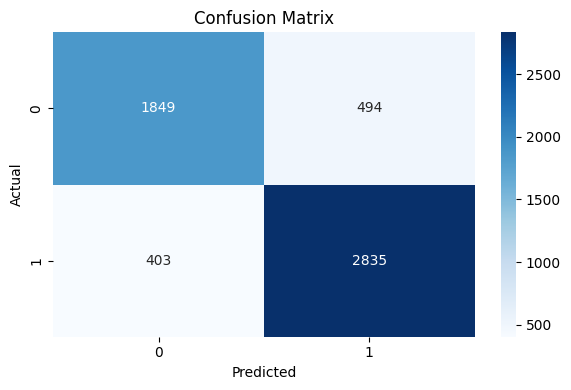

In [24]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, predictions) # Changed y_pred to predictions
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [26]:
# STEP 11: Cross-validation
from sklearn.model_selection import cross_val_score # Import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\nCross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


Cross-validation scores: [0.84321806 0.85358423 0.84444444 0.84623656 0.85412186]
Average cross-validation accuracy: 0.8483210316107069


In [28]:
# STEP 12: Save the model
import joblib # Import the joblib library

joblib.dump(model, 'logistic_model.pkl')
print("\nModel saved as 'logistic_model.pkl'")


Model saved as 'logistic_model.pkl'
